# Predicting HDB Resale Prices in Singapore II
## Exploratory Data Analysis

In this part, we made use of publicly available datasets to generate a list of HDB resale flats and some amenities near them. In thos part, we will examine the variables in detail, in hope of gaining some insights into our data.

---

### Importing Necessary Packages

In this part, we will mostly be using Matplotlib and Seaborn to generate graphs to examine the dataset.

In [1]:
# Importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")
sns.set_palette("deep", n_colors=30)

In [2]:
# Importing dataset

resale_df = pd.read_csv('data/resale_prices.csv')

In [3]:
# Examining dataset

resale_df.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block,address,r_address,latitude,longitude,nearest_mrt,nearest_mrt_dist,nearest_pri_sch,nearest_pri_sch_dist,nearest_sec_sch,nearest_sec_sch_dist,nearest_mall,nearest_mall_dist,quarter,inflation_price
0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,2017-01,61 years 04 months,1979,10 TO 12,1,406,406 ANG MO KIO AVENUE 10,406 ANG MO KIO AVENUE 10,1.362005,103.853880,ANG MO KIO MRT STATION,1.000002,TOWNSVILLE PRIMARY SCHOOL,0.218124,DEYI SECONDARY SCHOOL,0.465777,AMK Hub,1.014089,2017Q1,253657.953698
1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,2017-01,60 years 07 months,1978,01 TO 03,2,108,108 ANG MO KIO AVENUE 4,108 ANG MO KIO AVENUE 4,1.370966,103.838202,MAYFLOWER MRT STATION,0.190030,ANG MO KIO PRIMARY SCHOOL,0.241601,MAYFLOWER SECONDARY SCHOOL,0.434455,Broadway Plaza,0.869109,2017Q1,273338.312175
2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,2017-01,62 years 05 months,1980,01 TO 03,3,602,602 ANG MO KIO AVENUE 5,602 ANG MO KIO AVENUE 5,1.380709,103.835368,LENTOR MRT STATION,0.532151,MAYFLOWER PRIMARY SCHOOL,0.506847,PRESBYTERIAN HIGH SCHOOL,0.789393,Broadway Plaza,1.525833,2017Q1,286458.551159
3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,2017-01,62 years 01 month,1980,04 TO 06,4,465,465 ANG MO KIO AVENUE 10,465 ANG MO KIO AVENUE 10,1.366201,103.857201,ANG MO KIO MRT STATION,0.945591,TECK GHEE PRIMARY SCHOOL,0.691887,DEYI SECONDARY SCHOOL,0.518707,myVillage At Serangoon Garden,0.894047,2017Q1,289738.610906
4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,2017-01,62 years 05 months,1980,01 TO 03,5,601,601 ANG MO KIO AVENUE 5,601 ANG MO KIO AVENUE 5,1.381041,103.835132,LENTOR MRT STATION,0.498418,MAYFLOWER PRIMARY SCHOOL,0.546442,PRESBYTERIAN HIGH SCHOOL,0.811047,Broadway Plaza,1.569570,2017Q1,289738.610906


---

### Formatting Variables

Before we start exploring the dataset, there are some additional treatments on certain features that we have to do.
* For remaining_lease, it is currently given as a string of 'xx years and xx months'. Since this is a continuous variable, we would like to convert this into a float value. We will be changing the number of months into a decimal by using 12 months as a base.
* For storey_range, it is currently given in intervals of storeys. Since this is a numeric variable, we would also like to convert this to an integar value. We will be taking the average storey of the interval.

In [4]:
# Function to convert remaining_lease to float

def get_remaining_lease(lease):
    parts = lease.split(' ')
    if len(parts) == 2:
        return float(parts[0])
    else:
        return float(parts[0]) + (float(parts[2]) / 12)

In [5]:
# Converting and appending new float value to dataset

resale_df['lease_deci'] = resale_df['remaining_lease'].apply(get_remaining_lease)

In [6]:
# There is one value of remaining_lease that is 0

resale_df[resale_df['remaining_lease'] == '00 years']

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block,address,r_address,latitude,longitude,nearest_mrt,nearest_mrt_dist,nearest_pri_sch,nearest_pri_sch_dist,nearest_sec_sch,nearest_sec_sch_dist,nearest_mall,nearest_mall_dist,quarter,inflation_price,lease_deci
85126,ANG MO KIO,3 ROOM,New Generation,73.0,ANG MO KIO AVE 3,310000.0,2020-12,00 years,1979,01 TO 03,85127,425,425 ANG MO KIO AVENUE 3,425 ANG MO KIO AVENUE 3,1.369154,103.851747,ANG MO KIO MRT STATION,0.258439,JING SHAN PRIMARY SCHOOL,0.310815,DEYI SECONDARY SCHOOL,0.360186,AMK Hub,0.364822,2020Q4,328631.426498,0.0


In [7]:
# Using the typical 99 year lease for HDB flats, we will manually input a value for remaining_lease

resale_df.loc[85126, 'lease_deci'] = 58.0

HDB flats in Singapore are sold to oweners with a 99 year lease. This means that the remaining lease is just equal to the difference between the current year and 99 years from the lease commence date. As such, we would expect the lease_deci variable we created to be strongly correlated with lease_commence_date. As such, from this point on, we will only consider the remaining lease of the flat, and drop the lease commence date.

In [8]:
# Function to convert storey range to average storey

def get_mid_storey(storeys):
    low, high = storeys.split(' TO ')
    mid = (int(high) + int(low)) // 2
    return mid

In [9]:
resale_df['mid_storey'] = resale_df['storey_range'].apply(get_mid_storey)

---

### Correlation Matrix

We start by dropping variables that we are not looking to keep for analysis. These would include the id, address, latitude/longitude, and names of nearest amenities.

Firstly, we can examine the correlation matrix between the variables, to study any possible relationships between them.

In [79]:
# Dropping variables not used for analysis

resale_corr_df = resale_df.drop(['street_name', '_id', 'resale_price', 'block', 'lease_commence_date', 'address', 'r_address', 'latitude', 'longitude', 'nearest_mrt', 'nearest_pri_sch', 'nearest_sec_sch', 'nearest_mall', 'quarter'], axis=1)

In [80]:
# Obtaining list of numerical features in the dataset

numerical_features = [feature for feature in resale_corr_df.columns if resale_corr_df[feature].dtype != 'O']

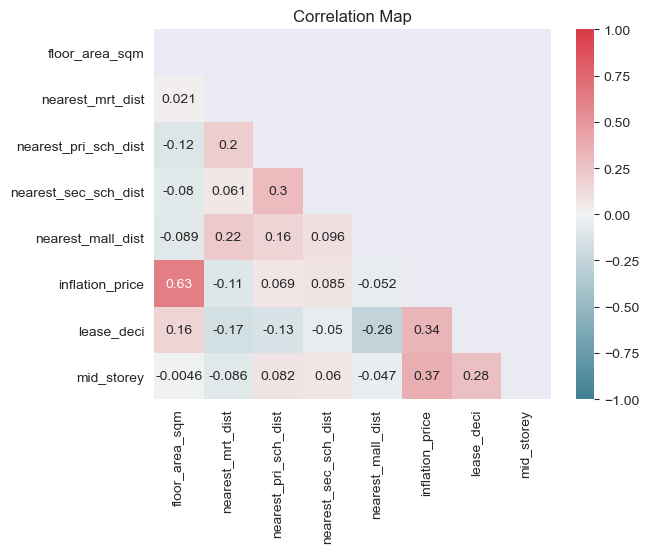

In [81]:
# Plotting correlation matrix for numerical features

corrs = resale_corr_df[numerical_features].corr()
mask = np.triu(np.ones_like(corrs, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrs, vmin=-1, vmax=1, annot=True, mask=mask, cmap=cmap)
plt.title('Correlation Map')
plt.show()

### Floor Area and Flat Type

One of the most immediate factors that determine the price of a flat is how big the flat is. In Singapore, flats are categorised based on their floor area into '1-room', '2-room', etc. Naturally, we would expect flats with a bigger floor area to fetch a larger price. This is backed up by a strong correlation of 0.63 as seen in the correlation matrix.

By plotting floor area against resale price, we can confirm some expected results.
* The categorisation for flat sizes is as expected (i.e. 1 room flats are the smallest, followed by 2 room flats, etc). There also seem to be some 3 room flats that are much larger than executive and multi-generation flats, which is counter-intuitive. This could be useful when we deal with outliers.
* The hypothesis that larger flats are more expensive is also observed.

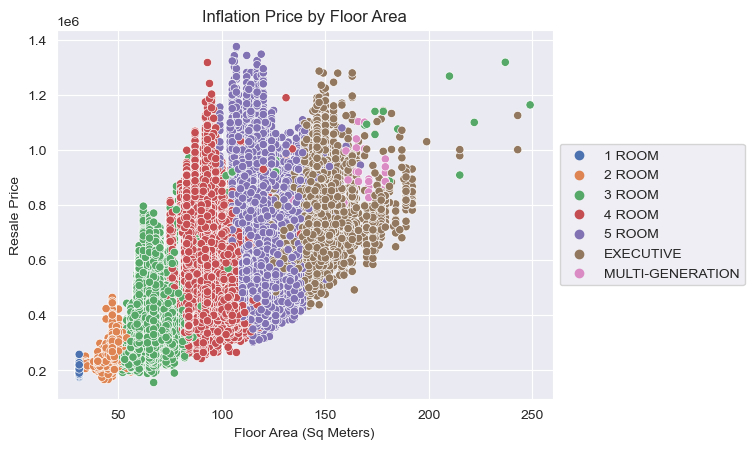

In [92]:
# Examining the relationship between flat type/floor area and resale price

ax = sns.scatterplot(data=resale_df, x='floor_area_sqm', y='inflation_price', hue='flat_type', hue_order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])
ax.set(xlabel='Floor Area (Sq Meters)', ylabel = 'Resale Price', title='Inflation Price by Floor Area')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

We can also examine the distribution of house types among resale flats. We see that most of the flats sold are either 3, 4, or 5 room flats. This is to be expected, as majority of flats built in Singapore are in these categories. On the other hand, very little 1 room and multi-generation flats were sold, as these flats are more rare.

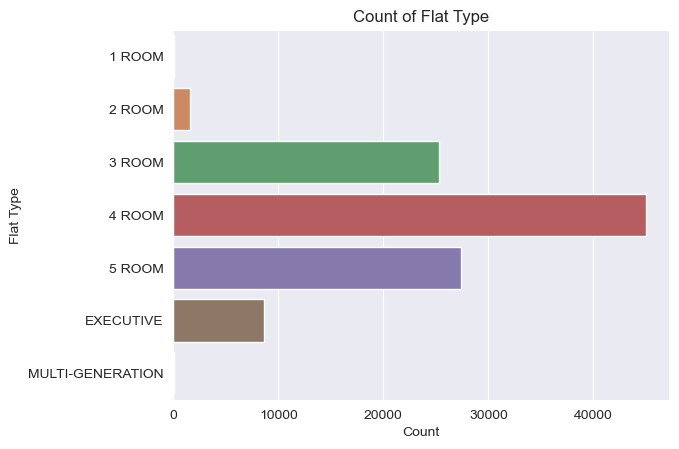

In [91]:
# Examining the distribution of resale flat types

ax = sns.countplot(data=resale_df, y='flat_type', order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])
ax.set(xlabel='Count', ylabel='Flat Type', title='Count of Flat Type')
plt.show()

Following what we observed about larger floor areas leading to higher price, we would expect larger flat types, such as 5 room and executive flats to have higher resale prices. However, it would be unwise for use to remove flat types and use floor area exclusively in our model. This is because different flat types differ in other ways as well. For example, a 3 room flat only has 2 bedrooms, while a 4 room or 5 room flat has 3 bedrooms.  These differences are also considerations for people looking to buy flats: for e.g. if you have a few children you would consider getting a 4 room or 5 room flat instead of a 3 room, so that your children can have their separate bedrooms. Since these details are not present in the dataset explicitly, we will keep flat type as a feature to distinguish between these flats.

We can also examine the effect of flat type on resale price. We see a clear cut relationship between flat types and resale price. Small 1 room flats have the lowest resale price, while large multi-generation flats have the highest resale price.

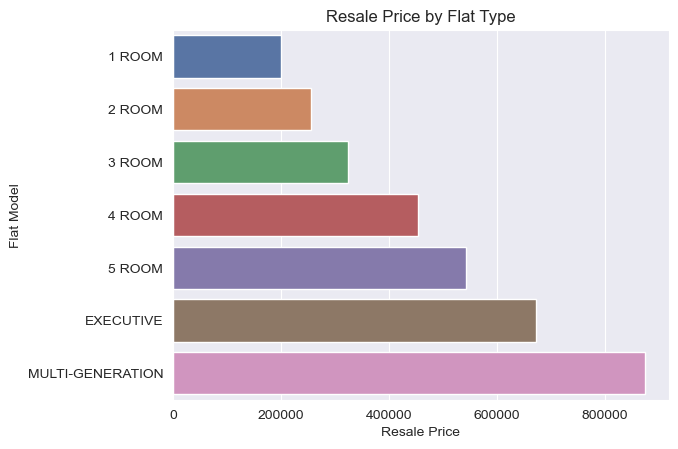

In [98]:
# Examining effect of flat type on median resale price

temp_df = resale_df.copy()
temp_df = temp_df.groupby('flat_type', as_index=False)['inflation_price'].median()
ax = sns.barplot(data=temp_df, x='inflation_price', y='flat_type', order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])
ax.set(xlabel='Resale Price', ylabel='Flat Model', title='Resale Price by Flat Type')
plt.show()

### Model Type

Flat model roughly refers to the layout of the house. Certain models are being used today, such as Improved, Model A. Other models are obsolete and no longer being built, such as Standard and Mansionettes. This can be confirmed by doing a plot of the different flat models and the remaining lease. Flat models that are obsolete will have shorter leases remaining, since they were built earlier, while flats that are still being built will have longer leases remaining.

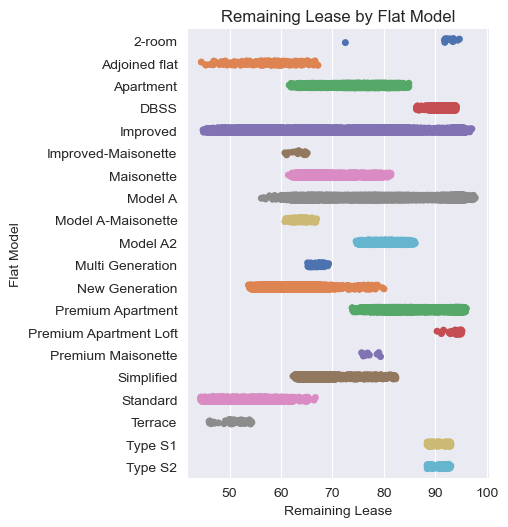

In [156]:
# Examining the remaining lease of various flat models

ax = sns.catplot(data=resale_df, x='lease_deci', y='flat_model', order=np.sort(resale_df['flat_model'].unique()))
ax.set(xlabel='Remaining Lease', ylabel='Flat Model', title='Remaining Lease by Flat Model')
plt.show()

The same flat type can have different flat models, and vice versa. Since we saw earlier that flat types affect resale price, we can see whether flat model also has an effect on resale price. One way to do this would be independent of flat types, i.e. for the same flat type, we see if different flat models have an effect on resale price.

By constructing a pivot table between flat types and flat models, we see that for 1 room and multi-generation flats, there is only one flat model. When examining the effect of flat models, we would naturally exclude these flat types.

In [152]:
# Examining counts of flat types and flat models

temp_df = resale_df.copy()
temp_df = resale_df[['flat_model', 'flat_type']]
flat_model_by_type = pd.pivot_table(temp_df, index='flat_model', columns='flat_type', aggfunc='size', fill_value='')

In [153]:
flat_model_by_type

flat_type,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI-GENERATION
flat_model,,,,,,,
2-room,,12.0,,,,,
Adjoined flat,,,,17.0,117.0,72.0,
Apartment,,,,,,4350.0,
DBSS,,1.0,250.0,802.0,974.0,,
Improved,48.0,296.0,6420.0,1249.0,19044.0,,
Improved-Maisonette,,,,,18.0,,
Maisonette,,,,,,3253.0,
Model A,,937.0,6426.0,26620.0,1443.0,,
Model A-Maisonette,,,,,193.0,,


We also see that there are certain flat models, such as DBSS and Premium Apartment Loft, that fetch high resale prices regardless of flat type. DBSS flats were built by private developers and can be considered as 'premium' HDB flats. Apartment lofts are rare flat models that have a unique and appealing layout. These flats are often more highly valued, and this is reflected in the higher resale price.

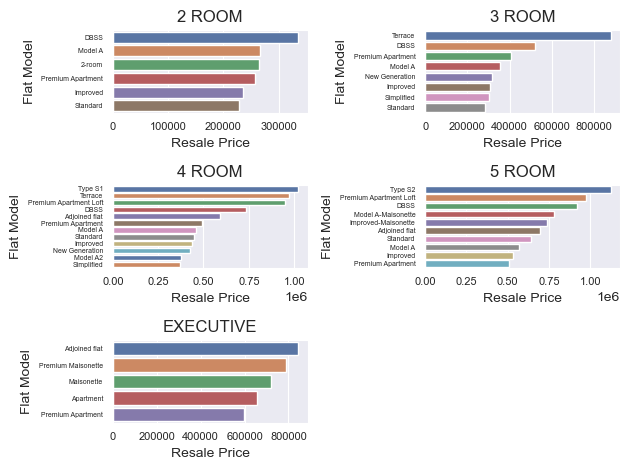

In [157]:
# Examining the relationship between flat model and resale price for each flat type

fig, axes = plt.subplots(nrows=3, ncols=2)
flat_types = ['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']
fig.delaxes(axes[2,1])

for ty, ax in zip(flat_types, axes.flat):
    temp_df = resale_df.copy()
    temp_df = temp_df[temp_df['flat_type'] == ty]
    temp_df = temp_df.groupby('flat_model', as_index=False)['inflation_price'].median()
    temp_df.sort_values(by='inflation_price', ascending=False, inplace=True)
    sns.barplot(data=temp_df, x='inflation_price', y='flat_model', order=temp_df['flat_model'], ax=ax)
    ax.set(xlabel='Resale Price', ylabel='Flat Model', title=ty)
    ax.tick_params(axis='y', labelsize=5)
    ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()
plt.show()

### Flat Storey

We now examine whether the storey of the resale flat has an impact on its resale price. We can start by examining the distribution of resale flats by their average storey. We see that most resale flats sold are between 2 to 20 storeys, which is the range of storeys for a typical HDB block. HOwever, we also see that there are flats that are in the 30 and 40 storey range. In total, there are about 900+ high storey resale flats. The highest of which is at the range 49-51 storeys, and upon confirmation of the address, corresponds to units at Pinnacle@Duxton, Singapore's tallest HDB project standing at 50 storeys.

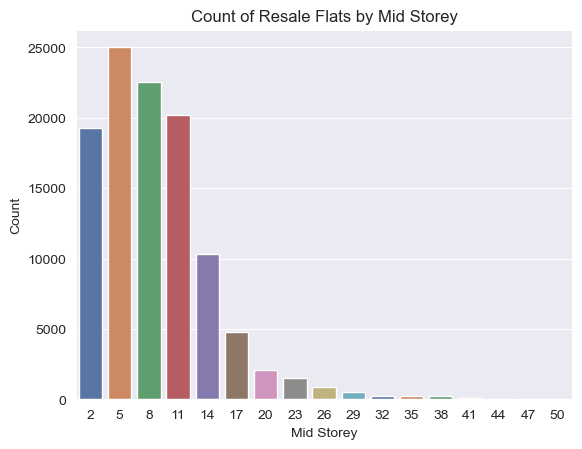

In [13]:
# Examining the distribution of resale flats by storey

ax = sns.countplot(data=resale_df, x='mid_storey', order=resale_df['mid_storey'].unique().sort())
ax.set(xlabel='Mid Storey', ylabel='Count', title='Count of Resale Flats by Mid Storey')
plt.show()

In [21]:
# Examining the flats with high storeys

resale_df[resale_df['mid_storey'] > 30].sort_values(by='mid_storey', ascending=False).head()

,town,flat_type,flat_model,floor_area_sqm,month,remaining_lease,storey_range,nearest_mrt_dist,nearest_pri_sch_dist,nearest_sec_sch_dist,nearest_mall_dist,inflation_price,lease_deci,mid_storey
8416,CENTRAL AREA,4 ROOM,Type S1,94.0,2017-06,92 years 07 months,49 TO 51,0.309109,1.860465,1.074731,0.522201,1.070899e+06,92.583333,50
208,CENTRAL AREA,5 ROOM,Type S2,105.0,2017-01,93 years,49 TO 51,0.309109,1.860465,1.074731,0.522201,1.211435e+06,93.000000,50
2721,CENTRAL AREA,4 ROOM,Type S1,94.0,2017-03,92 years 10 months,49 TO 51,0.418705,1.889181,1.182165,0.532145,1.041966e+06,92.833333,50
95225,CENTRAL AREA,5 ROOM,Type S2,105.0,2021-04,88 years 10 months,49 TO 51,0.400428,1.907945,1.166469,0.496828,1.200000e+06,88.833333,50
52955,CENTRAL AREA,4 ROOM,Type S1,94.0,2019-07,90 years 06 months,49 TO 51,0.487248,1.924882,1.248814,0.532266,1.241436e+06,90.500000,50


INSERT TEXT

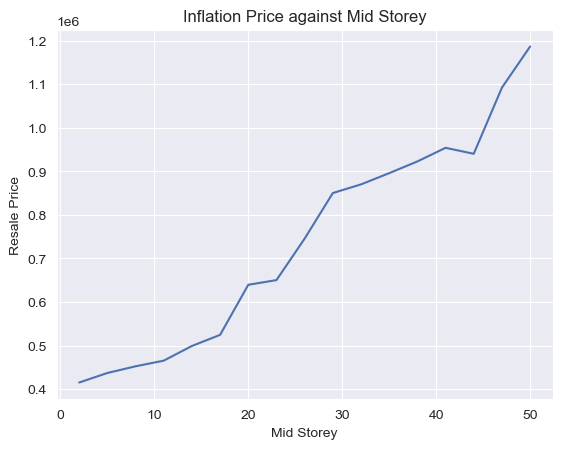

In [11]:
# Examining the relationship between storey of resale flat and resale price

temp_df = resale_df.copy()
temp_df = temp_df.groupby('mid_storey', as_index=False)['inflation_price'].median()

ax = sns.lineplot(data=temp_df, x='mid_storey', y='inflation_price')
ax.set(xlabel='Mid Storey', ylabel='Resale Price', title='Inflation Price against Mid Storey')
plt.show()

### Town

Looking at the distribution of resale flats by town, we see that the highest proportion of resale flats come from developing towns such as Sengkang, Punggol. Looking at the distribution of remaining lease of these resale flats, these flats are relatively new, with the oldest flats still having over 70 years of lease left. On the other end, we also see that estates with older flats, such as Marine Parade and Bukit Timah, have much lower numbers of resale flats.

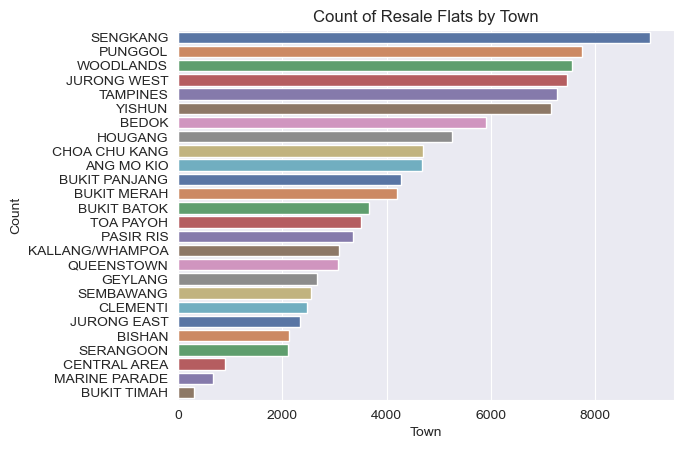

In [29]:
# Examining the distribution of resale flats by town

ax = sns.countplot(data=resale_df, y='town', order=resale_df['town'].value_counts().index)
ax.set(xlabel='Town', ylabel='Count', title='Count of Resale Flats by Town')
plt.show()

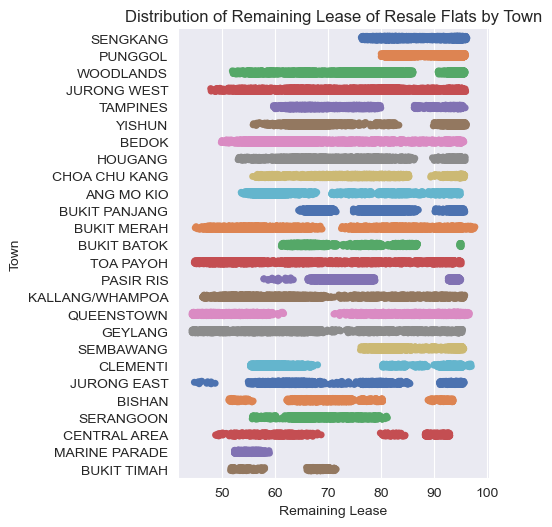

In [30]:
# Examining the distribution of remaining lease of resale flats by town

ax = sns.catplot(data=resale_df, x='lease_deci', y='town', order=resale_df['town'].value_counts().index)
ax.set(xlabel='Remaining Lease', ylabel='Town', title='Distribution of Remaining Lease of Resale Flats by Town')
plt.show()

We would also expect the town that the resale flat is located in to play an important part in determining the resale price of HDB flats. Geographically, certain towns such as those in the central area provide better accessiblity to different parts of Singapore. We would expect the prices of resale flats in these areas to be higher, as owners are likely to be paying a premium for the convenience. Another way towns affect resale price is through amenities. Certain towns are marked as mature estates, which have been around for longer and typically have more facilities and amenities such as malls, schools, or sports facilities. In contrast, certain towns marked as non-mature estates are up and coming estate areas, and are less developed. Naturally, we would expect flats in mature estates to also have a premium over flats in non-mature estates.

Looking at the median resale price by town, we see that the hypothesis is largely correct. The towns with the highest median resale prices are towns that are located in Central or Southern Singapore. Furthermore, towns with the highest resale prices also happen to be mature estates. The breakdown of towns into mature and non-mature estates is based on a breakdown by [PropertyGuru](https://www.propertyguru.com.sg/property-investment-questions/hi-guruwhere-is-the-mature-and-no-mature-estates-plse-advise-192099), which catagorises mature estates as residential areas that are more then 20 years old, and non-mature estates as residential areas that are less than 20 years old.

However, we also see that the town with the lowest median resale price is Ang Mo Kio, which also falls into the category of Central mature estates. One possible reason for the distinction is the distribution of flat types in Ang Mo Kio. Looking at the distribution of resale flats in Ang Mo Kio, we see that a large majority of resale flats are 3 room flats, while flats in other mature estates like Bukit Timah and Bishan are majority 4 room flats.

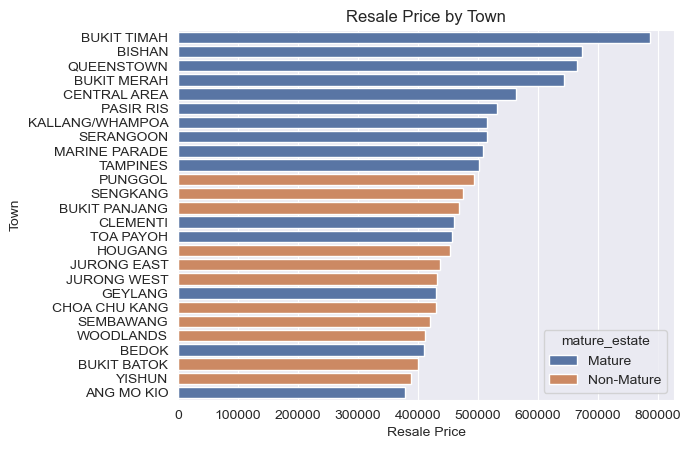

In [54]:
# Examining the median resale price by town

temp_df = resale_df.copy()
temp_df = temp_df.groupby('town', as_index=False)['inflation_price'].median()
temp_df.sort_values(by='inflation_price', ascending=False, inplace=True)

mature_estates = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'CLEMENTI', 'GEYLANG', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN', 'SERANGOON', 'TAMPINES', 'TOA PAYOH']
# non_mature_estates = ['BUKIT BATOK', 'BUKIT PANJANG', 'CHOA CHU KANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'PUNGGOL', 'SEMBAWANG', 'SENGKANG', 'WOODLANDS', 'YISHUN']
temp_df['mature_estate'] = np.where(temp_df['town'].isin(mature_estates), 'Mature', 'Non-Mature')

ax = sns.barplot(data=temp_df, x='inflation_price', y='town', hue=temp_df['mature_estate'], dodge=False)
ax.set(xlabel='Resale Price', ylabel='Town', title='Resale Price by Town')

plt.show()

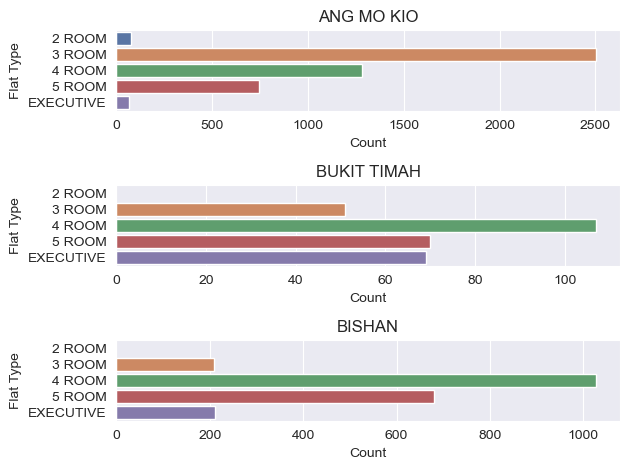

In [59]:
# Examining the distribution of resale flat types in Ang Mo Kio, Bukit Timah, and Bishan

fig, axes = plt.subplots(nrows=3, ncols=1)

sns.countplot(data=resale_df[resale_df['town'] == 'ANG MO KIO'], y='flat_type', ax=axes[0], order=['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE'])
axes[0].set(xlabel='Count', ylabel='Flat Type', title='ANG MO KIO')
sns.countplot(data=resale_df[resale_df['town'] == 'BUKIT TIMAH'], y='flat_type', ax=axes[1], order=['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE'])
axes[1].set(xlabel='Count', ylabel='Flat Type', title='BUKIT TIMAH')
sns.countplot(data=resale_df[resale_df['town'] == 'BISHAN'], y='flat_type', ax=axes[2], order=['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE'])
axes[2].set(xlabel='Count', ylabel='Flat Type', title='BISHAN')
fig.tight_layout()
plt.show()

### Remaining Lease

HDB flats in Singapore have a 99 year lease period. Since the time to own a house is finite, we would expect houses with longer lease remaining to sell for a higher price. Looking at the distribution of resale price by remaining lease however, we do not see any obvious relationship between the two. Instead, we notice that there are certain timings when people choose to sell their house. We see that a large number of resale flats are either around 95 years, 80 years, or 65 years. For new houses in Singapore, there is a minimum occupancy (MOP) requirement of 5 years, so it is likely that the spike at 95 years is due to flat owners who just passed the MOP period looking to sell their flats for a higher price/to upgrade to a larger house.

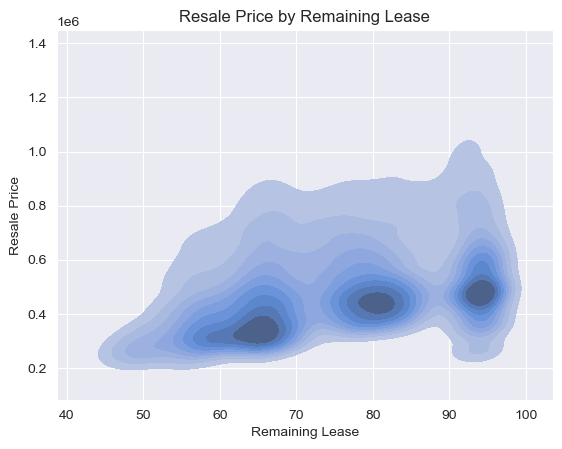

In [66]:
# Examining the relationship between remaining lease and resale price

ax = sns.kdeplot(data=resale_df, x='lease_deci', y='inflation_price', fill=True)
ax.set(xlabel='Remaining Lease', ylabel='Resale Price', title='Resale Price by Remaining Lease')
plt.show()

### Distance to Amenities

As previously mentioned in the Dataset file, additional features were added to each resale flat based on their distance to certain amenities. These amenities were chosen because they were likely to be things that flat owners would be concerned about when choosing to buy a resale flat. We now examine whether these amenities have an impact on resale price.

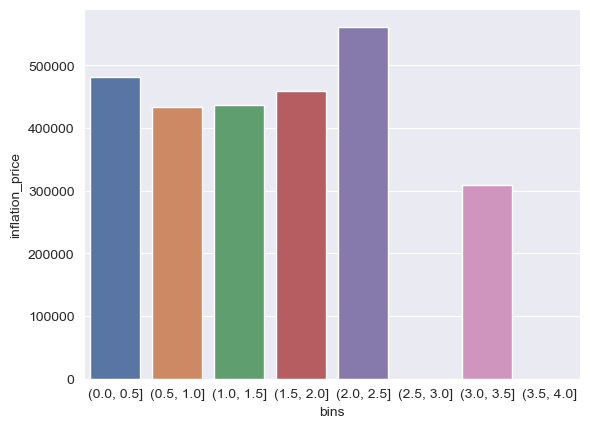

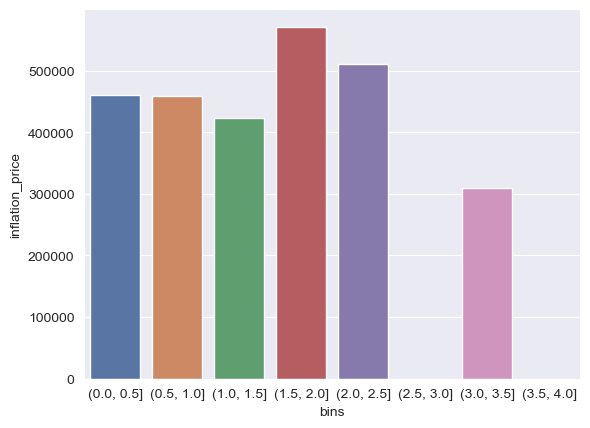

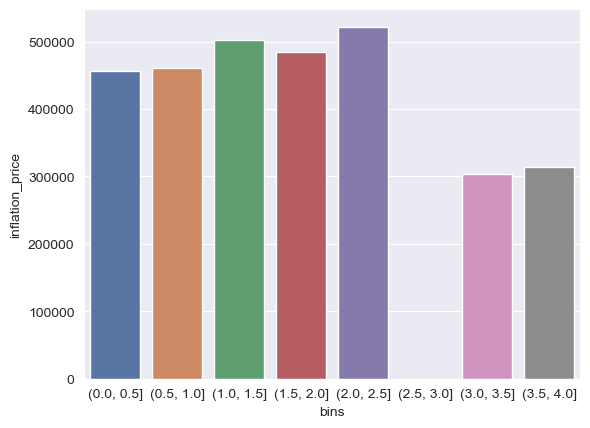

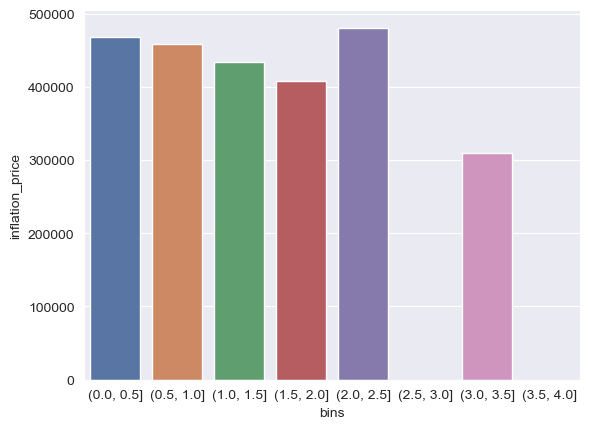

In [13]:
# Examining the relationship between distance to amenities and resale price

amenities_features = {'nearest_mrt_dist': 'Distance to Nearest MRT', 'nearest_pri_sch_dist': 'Distance to Nearest Primary School', 'nearest_sec_sch_dist': 'Distance to Nearest Secondary School', 'nearest_mall_dist': 'Distance to Nearest Shopping Mall'}

for feature in amenities_features:
    temp_df = resale_df.copy()
    temp_df['bins'] = pd.cut(temp_df[feature], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
    temp_df = temp_df.groupby(by='bins', as_index=False)['inflation_price'].median()
    sns.barplot(data=temp_df, x='bins', y='inflation_price')
    plt.show()

---

## Saving Dataset

Since we added some new features to the dataset in the beginning of the EDA phase, we will save the new dataset to a final file before we begin building models to predict resale prices.

In [17]:
resale_df_final = resale_df.to_csv('data/resale_prices_final.csv', index=False)